In [1]:
import matplotlib
matplotlib.use('Agg')

import sys
import matplotlib.animation
print matplotlib.animation.writers.list()
print sys.path
import numpy
import mozaik
from mozaik.controller import run_workflow, setup_logging
from mozaik.storage.datastore import Hdf5DataStore,PickledDataStore
from parameters import ParameterSet
from mozaik.visualization.plotting import *

from mozaik.analysis.technical import NeuronAnnotationsToPerNeuronValues
from mozaik.tools.mozaik_parametrized import colapse, colapse_to_dictionary, MozaikParametrized
from mozaik.analysis.analysis import *
from mozaik.analysis.vision import *
from mozaik.storage.queries import *
from mozaik.visualization.helper_functions import *

import sys
sys.path.append('/home/antolikjan/remote/IOV/projects/mozaik/contrib/')
import Kremkow_plots
%matplotlib inline

setup_logging()

data_store_full = PickledDataStore(load=True,parameters=ParameterSet({'root_directory':'/home/antolikjan/remote/IOV/projects/mozaik/contrib/MorganTaylorModel/AfferentInvest/full','store_stimuli': False}),replace=True)
data_store_aff = PickledDataStore(load=True,parameters=ParameterSet({'root_directory':'/home/antolikjan/remote/IOV/projects/mozaik/contrib/MorganTaylorModel/AfferentInvest/only_afferent','store_stimuli': False}),replace=True)
                  
NeuronAnnotationsToPerNeuronValues(data_store_full,ParameterSet({})).analyse()
NeuronAnnotationsToPerNeuronValues(data_store_aff,ParameterSet({})).analyse()

analog_ids_full = param_filter_query(data_store_full,sheet_name="V1_Exc_L4").get_segments()[0].get_stored_esyn_ids()
analog_ids_aff = param_filter_query(data_store_aff,sheet_name="V1_Exc_L4").get_segments()[0].get_stored_esyn_ids()
analog_ids_inh_aff = param_filter_query(data_store_aff,sheet_name="V1_Exc_L4").get_segments()[0].get_stored_isyn_ids()



[u'imagemagick_file', u'imagemagick', u'ffmpeg', u'ffmpeg_file', u'html', u'pillow']
['', '/home/antolikjan/virt_env/mozaik/lib/python2.7', '/home/antolikjan/virt_env/mozaik/lib/python2.7/plat-x86_64-linux-gnu', '/home/antolikjan/virt_env/mozaik/lib/python2.7/lib-tk', '/home/antolikjan/virt_env/mozaik/lib/python2.7/lib-old', '/home/antolikjan/virt_env/mozaik/lib/python2.7/lib-dynload', '/usr/lib/python2.7', '/usr/lib/python2.7/plat-x86_64-linux-gnu', '/usr/lib/python2.7/lib-tk', '/home/antolikjan/virt_env/mozaik/local/lib/python2.7/site-packages', '/home/antolikjan/virt_env/mozaik/lib/python2.7/site-packages', '/home/antolikjan/virt_env/mozaik/local/lib/python2.7/site-packages/IPython/extensions', '/home/antolikjan/.ipython']


  Starting NeuronAnnotationsToPerNeuronValues analysis
  Starting NeuronAnnotationsToPerNeuronValues Analysis
NeuronAnnotationsToPerNeuronValues analysis took: 6.21659994125seconds
  Starting NeuronAnnotationsToPerNeuronValues analysis
  Starting NeuronAnnotationsToPerNeuronValues Analysis
NeuronAnnotationsToPerNeuronValues analysis took: 6.24738097191seconds


In [2]:
dsv = param_filter_query(data_store_full,st_name='InternalStimulus',sheet_name='V1_Exc_L4')
full_spont = dsv.get_segments()[0].get_esyn(numpy.array(idd)).magnitude
dsv = param_filter_query(data_store_aff,st_name='InternalStimulus',sheet_name='V1_Exc_L4')
aff_spont = dsv.get_segments()[0].get_esyn(numpy.array(idd)).magnitude

NameError: name 'idd' is not defined

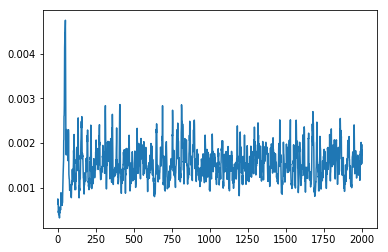

In [22]:
dsv = param_filter_query(data_store_full,st_name='FullfieldDriftingSinusoidalGrating',st_orientation=0,st_contrast=100,sheet_name='V1_Exc_L4')

full = 0
for seg in dsv.get_segments():
    for idd in analog_ids_full:
        full+=seg.get_esyn(numpy.array(idd)).magnitude
full = full/10/len(analog_ids_full)
pylab.plot(full)

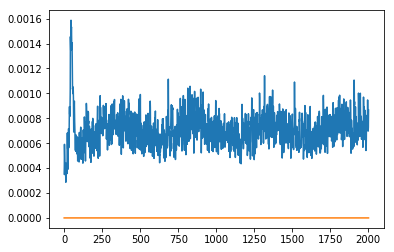

In [42]:
dsv = param_filter_query(data_store_aff,st_name='FullfieldDriftingSinusoidalGrating',st_orientation=0,st_contrast=100,sheet_name='V1_Exc_L4')

aff= 0
aff_inh= 0
for seg in dsv.get_segments():
    for idd in analog_ids_aff:
        aff+=seg.get_esyn(numpy.array(idd)).magnitude
aff = aff/10/len(analog_ids_aff)

for seg in dsv.get_segments():
    for idd in analog_ids_inh_aff:
        aff_inh+=seg.get_isyn(numpy.array(idd)).magnitude
aff_inh = aff_inh/10/len(analog_ids_inh_aff)

pylab.plot(aff)
pylab.plot(aff_inh)

In [43]:
print numpy.mean(aff[100:])/numpy.mean(full[100:]) * 100
print (numpy.mean(aff[100:])-numpy.mean(aff_spont))/(numpy.mean(full[100:])-numpy.mean(full_spont)) * 100

45.9061784723
47.1726900654


In [46]:
TrialMean(queries.param_filter_query(data_store_full,st_name='FullfieldDriftingSinusoidalGrating'),ParameterSet({'cond_exc' : True,'cond_inh' : True, 'vm' : False })).analyse()


  Starting TrialMean analysis
  Starting TrialMean analysis
TrialMean analysis took: 1314.74056196seconds
TrialMean analysis took: 1314.74056196seconds


NameError: name 'data_store' is not defined

In [2]:
TrialMean(queries.param_filter_query(data_store_full,st_name='FlashedBar'),ParameterSet({'cond_exc' : True,'cond_inh' : True, 'vm' : False })).analyse()
TrialMean(queries.param_filter_query(data_store_aff,st_name='FlashedBar'),ParameterSet({'cond_exc' : True,'cond_inh' : True, 'vm' : False })).analyse()

  Starting TrialMean analysis
TrialMean analysis took: 876.12033391seconds
  Starting TrialMean analysis
TrialMean analysis took: 918.319149017seconds


In [8]:
dsv = param_filter_query(data_store_full,analysis_algorithm='TrialMean',st_name='FlashedBar',sheet_name='V1_Exc_L4',y_axis_name=['inh. conductance trial-to-trial mean'],st_relative_luminance=1)
dsv.print_content()


  DSV info:
     Number of recordings: 0
     Number of ADS: 18
       AnalogSignalList : 18


In [30]:
dsv = param_filter_query(data_store_full,analysis_algorithm='TrialMean',st_name='FlashedBar',sheet_name='V1_Exc_L4',y_axis_name=['inh. conductance trial-to-trial mean'],st_relative_luminance=1)
d_0_inh = {MozaikParametrized.idd(ads.stimulus_id).y : ads for ads in dsv.get_analysis_result()}
dsv = param_filter_query(data_store_full,analysis_algorithm='TrialMean',st_name='FlashedBar',sheet_name='V1_Exc_L4',y_axis_name=['inh. conductance trial-to-trial mean'],st_relative_luminance=0)
d_1_inh = {MozaikParametrized.idd(ads.stimulus_id).y : ads for ads in dsv.get_analysis_result()}
dsv = param_filter_query(data_store_full,analysis_algorithm='TrialMean',st_name='FlashedBar',sheet_name='V1_Exc_L4',y_axis_name=['exc. conductance trial-to-trial mean'],st_relative_luminance=1)
d_0_exc = {MozaikParametrized.idd(ads.stimulus_id).y : ads for ads in dsv.get_analysis_result()}
dsv = param_filter_query(data_store_full,analysis_algorithm='TrialMean',st_name='FlashedBar',sheet_name='V1_Exc_L4',y_axis_name=['exc. conductance trial-to-trial mean'],st_relative_luminance=0)
d_1_exc = {MozaikParametrized.idd(ads.stimulus_id).y : ads for ads in dsv.get_analysis_result()}


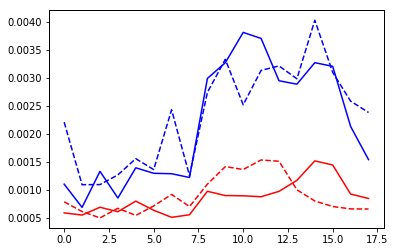

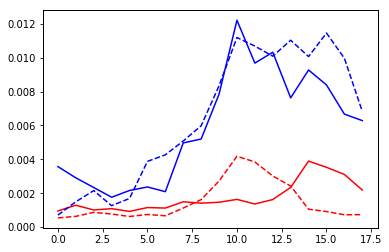

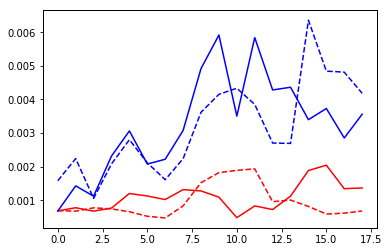

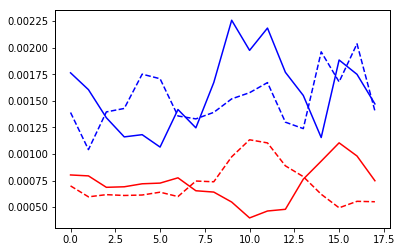

In [59]:
idd = analog_ids_full[4]

m_0_exc = numpy.squeeze([d_0_exc[k].get_asl_by_id(idd).magnitude for k in sorted(d.keys())])
m_1_exc = numpy.squeeze([d_1_exc[k].get_asl_by_id(idd).magnitude for k in sorted(d.keys())])
m_0_inh = numpy.squeeze([d_0_inh[k].get_asl_by_id(idd).magnitude for k in sorted(d.keys())])
m_1_inh = numpy.squeeze([d_1_inh[k].get_asl_by_id(idd).magnitude for k in sorted(d.keys())])

pylab.figure()
pylab.plot(numpy.squeeze(numpy.mean(m_0_exc[:,0:50],axis=1)),'r')
pylab.plot(numpy.squeeze(numpy.mean(m_1_exc[:,0:50],axis=1)),'r--')
pylab.plot(numpy.squeeze(numpy.mean(m_0_inh[:,0:50],axis=1)),'b')
pylab.plot(numpy.squeeze(numpy.mean(m_1_inh[:,0:50],axis=1)),'b--')

pylab.figure()
pylab.plot(numpy.squeeze(numpy.mean(m_0_exc[:,50:70],axis=1)),'r')
pylab.plot(numpy.squeeze(numpy.mean(m_1_exc[:,50:70],axis=1)),'r--')
pylab.plot(numpy.squeeze(numpy.mean(m_0_inh[:,50:70],axis=1)),'b')
pylab.plot(numpy.squeeze(numpy.mean(m_1_inh[:,50:70],axis=1)),'b--')

pylab.figure()
pylab.plot(numpy.squeeze(numpy.mean(m_0_exc[:,70:90],axis=1)),'r')
pylab.plot(numpy.squeeze(numpy.mean(m_1_exc[:,70:90],axis=1)),'r--')
pylab.plot(numpy.squeeze(numpy.mean(m_0_inh[:,70:90],axis=1)),'b')
pylab.plot(numpy.squeeze(numpy.mean(m_1_inh[:,70:90],axis=1)),'b--')

pylab.figure()
pylab.plot(numpy.squeeze(numpy.mean(m_0_exc[:,100:200],axis=1)),'r')
pylab.plot(numpy.squeeze(numpy.mean(m_1_exc[:,100:200],axis=1)),'r--')
pylab.plot(numpy.squeeze(numpy.mean(m_0_inh[:,100:200],axis=1)),'b')
pylab.plot(numpy.squeeze(numpy.mean(m_1_inh[:,100:200],axis=1)),'b--')

In [32]:
pylab.shape(m_0_exc[])

(18, 301)

PlotTemporalTuningCurve plotting took: 0.410299062729seconds
PlotTemporalTuningCurve plotting took: 0.118646144867seconds
PlotTemporalTuningCurve plotting took: 0.113144874573seconds
PlotTemporalTuningCurve plotting took: 0.114492893219seconds


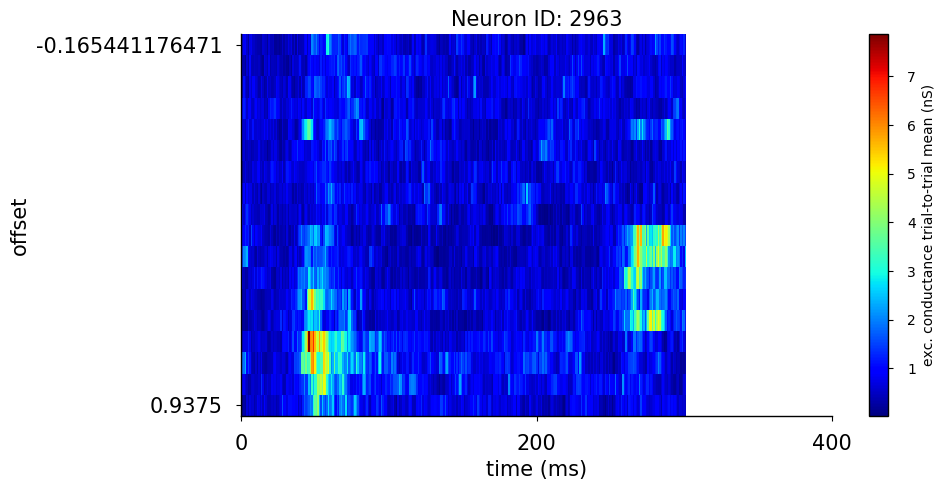

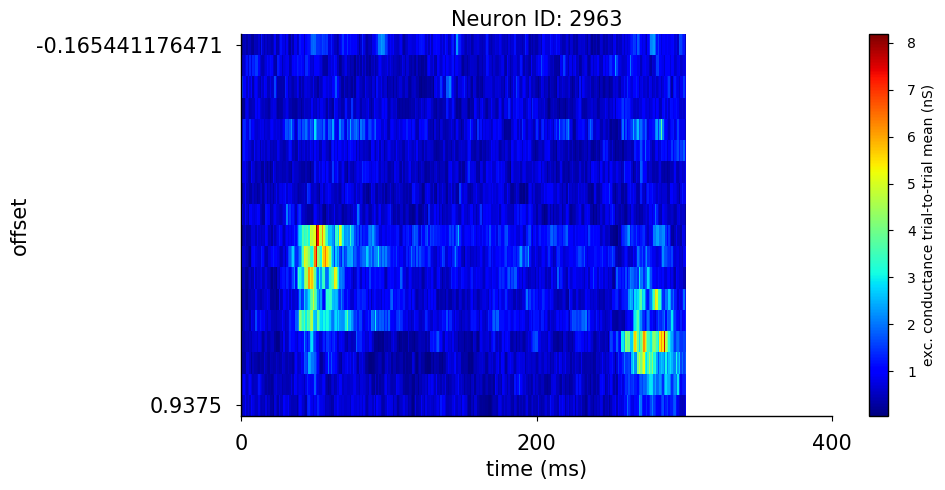

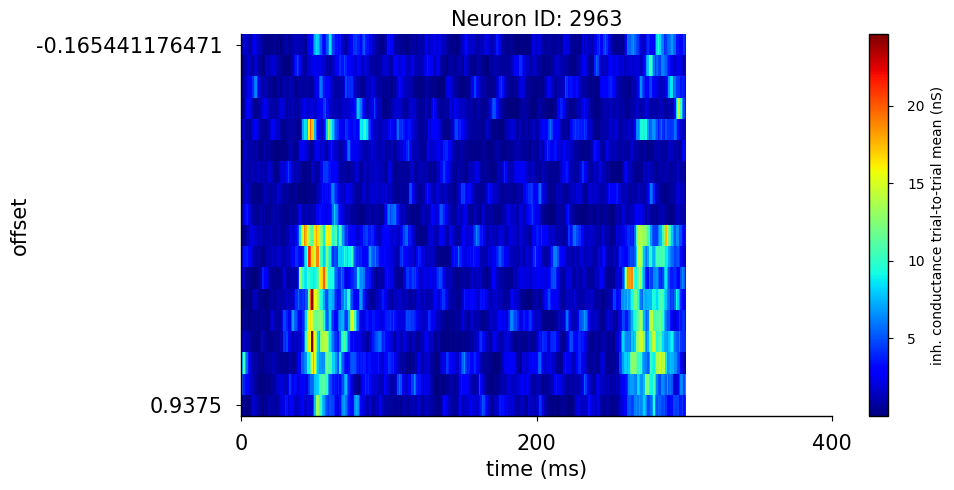

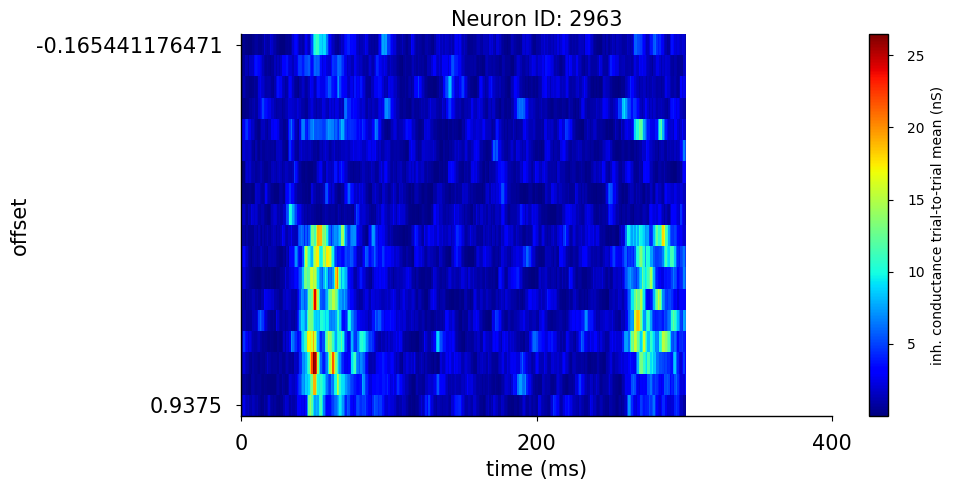

In [3]:
dsv = queries.param_filter_query(data_store_full,st_name='FlashedBar',y_axis_name=['exc. conductance trial-to-trial mean'],sheet_name = 'V1_Exc_L4',analysis_algorithm='TrialMean',st_relative_luminance=1)
mozaik.visualization.plotting.PlotTemporalTuningCurve(dsv, ParameterSet({'parameter_name' : 'y', 'neurons': [analog_ids_full[4]], 'sheet_name' : 'V1_Exc_L4','mean' : False}),fig_param={'dpi' : 100,'figsize': (10,5)},plot_file_name='AnalogSignalEvolutionOnBar1.png').plot({'*.interpolation' : 'none', '*.x_lim'  :(0,400),'*.y_label'  : 'offset'})
dsv = queries.param_filter_query(data_store_full,st_name='FlashedBar',y_axis_name=['exc. conductance trial-to-trial mean'],sheet_name = 'V1_Exc_L4',analysis_algorithm='TrialMean',st_relative_luminance=0)
mozaik.visualization.plotting.PlotTemporalTuningCurve(dsv, ParameterSet({'parameter_name' : 'y', 'neurons': [analog_ids_full[4]], 'sheet_name' : 'V1_Exc_L4','mean' : False}),fig_param={'dpi' : 100,'figsize': (10,5)},plot_file_name='AnalogSignalEvolutionOnBar1.png').plot({'*.interpolation' : 'none','*.x_lim'  :(0,400),'*.y_label'  : 'offset'})
dsv = queries.param_filter_query(data_store_full,st_name='FlashedBar',y_axis_name=['inh. conductance trial-to-trial mean'],sheet_name = 'V1_Exc_L4',analysis_algorithm='TrialMean',st_relative_luminance=1)
mozaik.visualization.plotting.PlotTemporalTuningCurve(dsv, ParameterSet({'parameter_name' : 'y', 'neurons': [analog_ids_full[4]], 'sheet_name' : 'V1_Exc_L4','mean' : False}),fig_param={'dpi' : 100,'figsize': (10,5)},plot_file_name='AnalogSignalEvolutionOnBar1.png').plot({'*.interpolation' : 'none', '*.x_lim'  :(0,400),'*.y_label'  : 'offset'})
dsv = queries.param_filter_query(data_store_full,st_name='FlashedBar',y_axis_name=['inh. conductance trial-to-trial mean'],sheet_name = 'V1_Exc_L4',analysis_algorithm='TrialMean',st_relative_luminance=0)
mozaik.visualization.plotting.PlotTemporalTuningCurve(dsv, ParameterSet({'parameter_name' : 'y', 'neurons': [analog_ids_full[4]], 'sheet_name' : 'V1_Exc_L4','mean' : False}),fig_param={'dpi' : 100,'figsize': (10,5)},plot_file_name='AnalogSignalEvolutionOnBar1.png').plot({'*.interpolation' : 'none','*.x_lim'  :(0,400),'*.y_label'  : 'offset'})
